In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar100

In [2]:
# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [3]:
# Print dataset shapes
print("Training set shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test set shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training set shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test set shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [4]:
# Convert labels to one-hot encoding
num_classes = 100
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [5]:
# Print shapes after preprocessing
print("Training set shape after preprocessing:", x_train.shape)
print("Training labels shape after preprocessing:", y_train.shape)
print("Test set shape after preprocessing:", x_test.shape)
print("Test labels shape after preprocessing:", y_test.shape)

Training set shape after preprocessing: (50000, 32, 32, 3)
Training labels shape after preprocessing: (50000, 100)
Test set shape after preprocessing: (10000, 32, 32, 3)
Test labels shape after preprocessing: (10000, 100)


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize

In [7]:
# Define class names for CIFAR-100
class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'computer_keyboard', 'lamp', 'lawn_mower', 'leopard', 
    'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 
    'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 
    'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 
    'worm'
]

In [8]:
# Function to plot images
def plot_images(images, labels):
    plt.figure(figsize=(20, 4))
    for i in range(min(5, len(images))):
        resized_image = resize(images[i], (64, 64), anti_aliasing=True, mode='reflect', preserve_range=True)  # Resize each image to 64x64 pixels
        # Scale the intensity values to the range [0, 255]
        resized_image = (resized_image - resized_image.min()) / (resized_image.max() - resized_image.min()) * 255
        plt.subplot(1, 5, i + 1)
        plt.imshow(resized_image.astype('uint8'), interpolation='lanczos')
        plt.title(class_names[np.argmax(labels[i])])  # Convert one-hot encoded label to class name
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [28]:
# Function to apply changes to all images in the dataset
def apply_changes_to_dataset(images):
    processed_images = []
    for image in images:
        resized_image = resize(image, (64, 64), anti_aliasing=True, mode='reflect', preserve_range=True)
        # Scale the intensity values to the range [0, 255]
        resized_image = (resized_image - resized_image.min()) / (resized_image.max() - resized_image.min()) * 255
        processed_images.append(resized_image.astype('uint8'))
    return np.array(processed_images)

In [29]:
# Apply changes to all images in the CIFAR-100 dataset
x_train_processed = apply_changes_to_dataset(x_train)
x_test_processed = apply_changes_to_dataset(x_test)

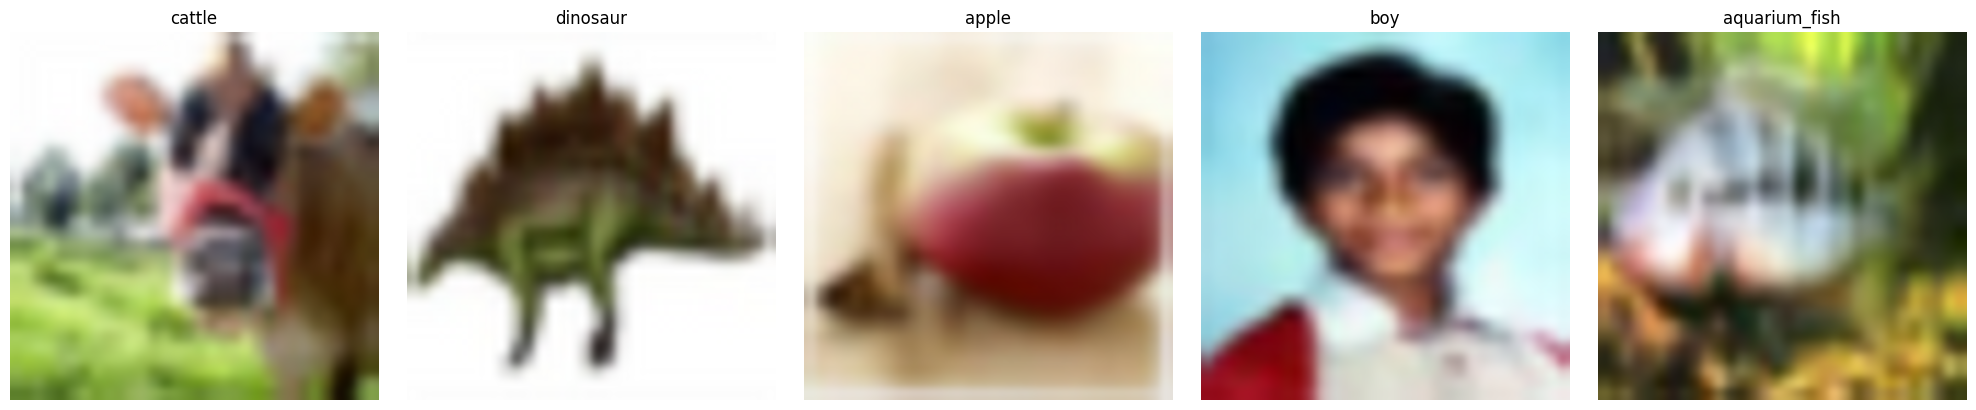

In [30]:
# Plot minimum 5 images from the processed CIFAR-100 dataset
plot_images(x_train_processed, y_train)

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [32]:
# Data Preprocessing and resizing images to (64, 64)
x_train = tf.image.resize(x_train, (64, 64))
x_test = tf.image.resize(x_test, (64, 64))

In [33]:
# Data Preprocessing
x_train = x_train_processed.astype('float32') / 255.0
x_test = x_test_processed.astype('float32') / 255.0

In [34]:
# Define the CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [35]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

In [37]:
# Train the model with data augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                    epochs=50,
                    validation_data=(x_test, y_test))

Epoch 1/50


/Users/avinash/Desktop/llm/model/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 206s 523ms/step - accuracy: 0.0385 - loss: 4.3550 - val_accuracy: 0.1422 - val_loss: 3.6646
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 215s 548ms/step - accuracy: 0.1326 - loss: 3.6903 - val_accuracy: 0.2253 - val_loss: 3.2197
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 234s 596ms/step - accuracy: 0.1790 - loss: 3.4012 - val_accuracy: 0.2600 - val_loss: 3.0126
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 243s 620ms/step - accuracy: 0.2145 - loss: 3.2190 - val_accuracy: 0.2919 - val_loss: 2.8687
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 243s 619ms/step - accuracy: 0.2358 - loss: 3.1002 - val_accuracy: 0.3222 - val_loss: 2.7369
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 241s 615ms/step - accuracy: 0.2532 - loss: 3.0047 - val_accuracy: 0.3357 - val_loss: 2.6564
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 249s 635ms/step - accuracy: 0.2702 - loss: 2.9240 - val_accuracy: 0.3599 - val_loss: 2.5169
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 300s 767ms/step - accuracy: 0.2856 - loss: 2.83

In [38]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.4955 - loss: 1.8945
Test accuracy: 0.4984000027179718


In [26]:
#This is model is not used

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

# Data Preprocessing
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
num_classes = 100
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define the CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# Train the model with data augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=128),
                    epochs=50,
                    validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)


Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 68s 169ms/step - accuracy: 0.0373 - loss: 4.3485 - val_accuracy: 0.1563 - val_loss: 3.5953
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 66s 169ms/step - accuracy: 0.1346 - loss: 3.6620 - val_accuracy: 0.2229 - val_loss: 3.2366
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 72s 184ms/step - accuracy: 0.1826 - loss: 3.3708 - val_accuracy: 0.2693 - val_loss: 2.9623
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 72s 184ms/step - accuracy: 0.2225 - loss: 3.1784 - val_accuracy: 0.3147 - val_loss: 2.7960
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 69s 177ms/step - accuracy: 0.2432 - loss: 3.0610 - val_accuracy: 0.3222 - val_loss: 2.6791
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 69s 175ms/step - accuracy: 0.2646 - loss: 2.9444 - val_accuracy: 0.3588 - val_loss: 2.5539
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 70s 179ms/step - accuracy: 0.2819 - loss: 2.8576 - val_accuracy: 0.3606 - val_loss: 2.4993
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 68s 172ms/step - accuracy: 0.2954 - loss: 2

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.4955 - loss: 1.8945
Test accuracy: 0.4984000027179718


In [45]:
# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step


In [46]:
# Calculate classification metrics
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78       100
           1       0.61      0.65      0.63       100
           2       0.39      0.24      0.30       100
           3       0.23      0.26      0.24       100
           4       0.28      0.33      0.30       100
           5       0.51      0.50      0.50       100
           6       0.46      0.56      0.50       100
           7       0.50      0.62      0.55       100
           8       0.76      0.55      0.64       100
           9       0.76      0.59      0.66       100
          10       0.31      0.46      0.37       100
          11       0.52      0.28      0.36       100
          12       0.65      0.47      0.55       100
          13       0.44      0.44      0.44       100
          14       0.46      0.37      0.41       100
          15       0.41      0.32      0.36       100
          16       0.60      0.49      0.54       100
          17       0.66    

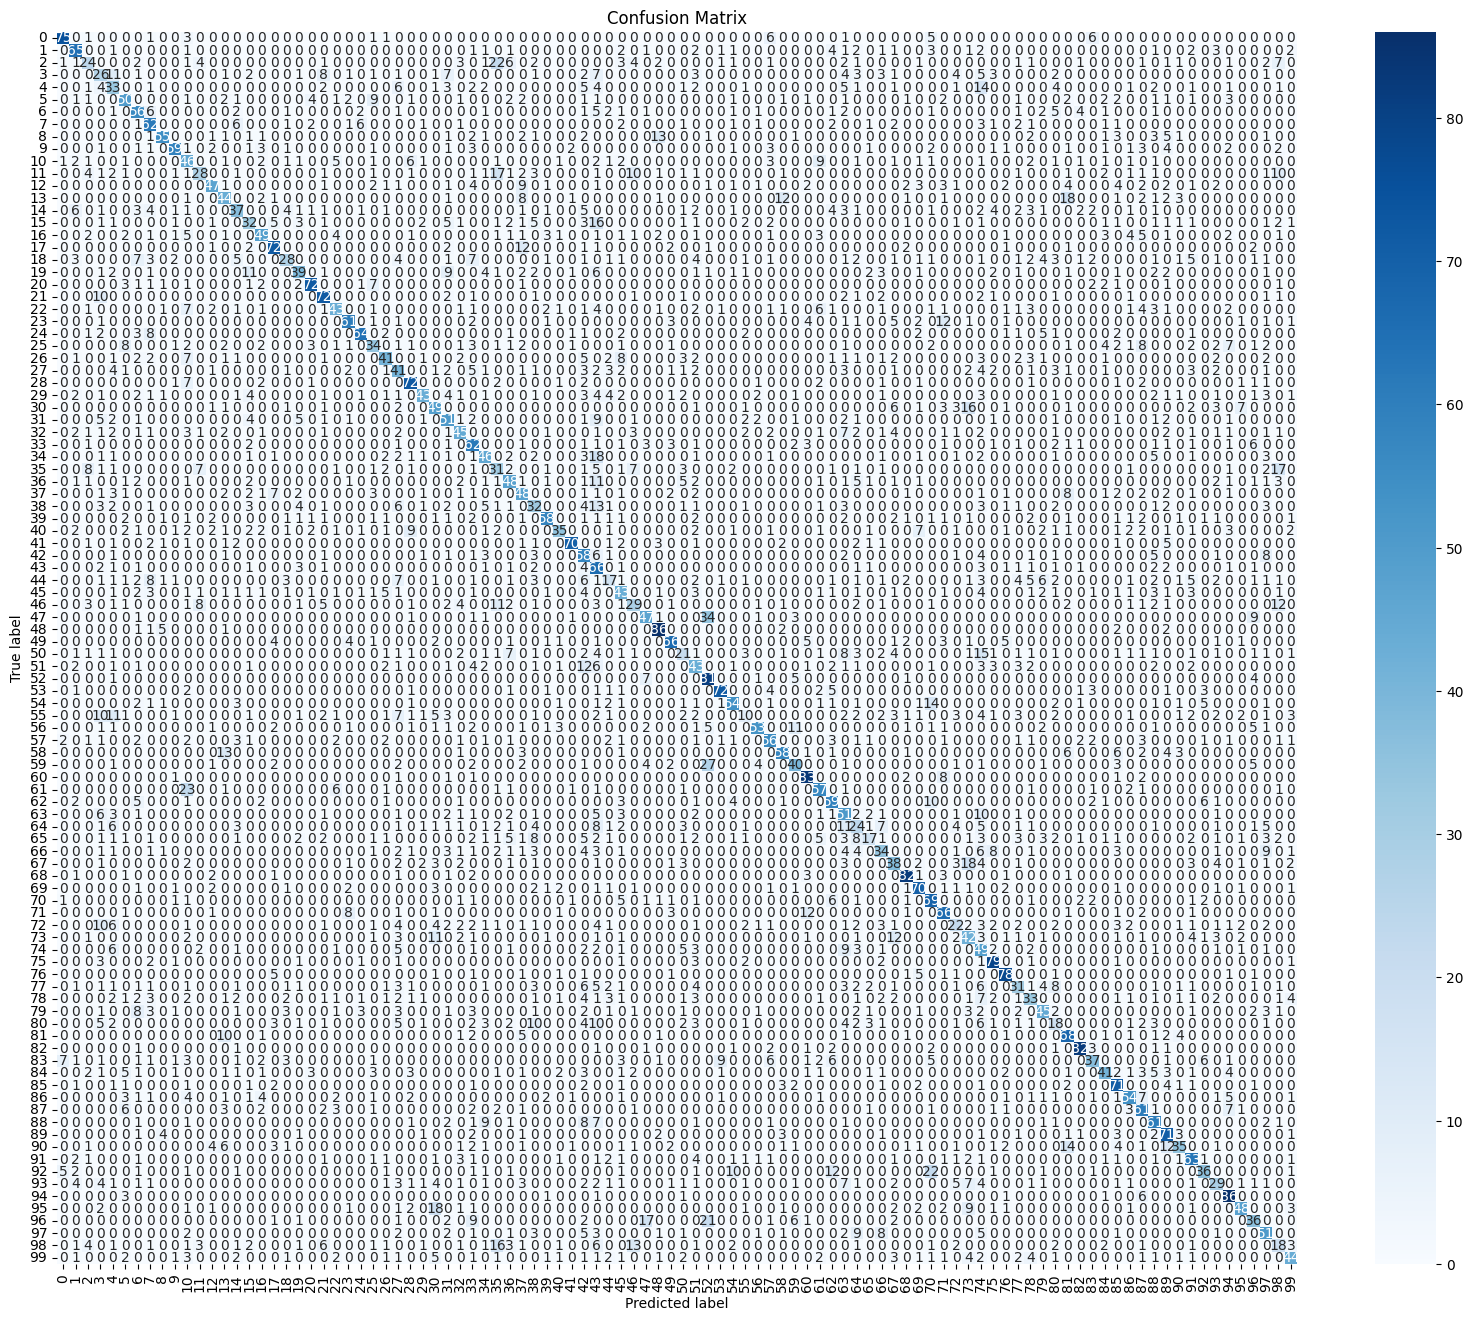

In [48]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(20, 16))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(100), yticklabels=range(100))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [52]:
# Load CIFAR-100 dataset and get the class names
(_, _), (_, y_test) = cifar100.load_data(label_mode='fine')
class_names = np.array([
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 
    'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 
    'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 
    'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 
    'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 
    'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 
    'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 
    'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
])

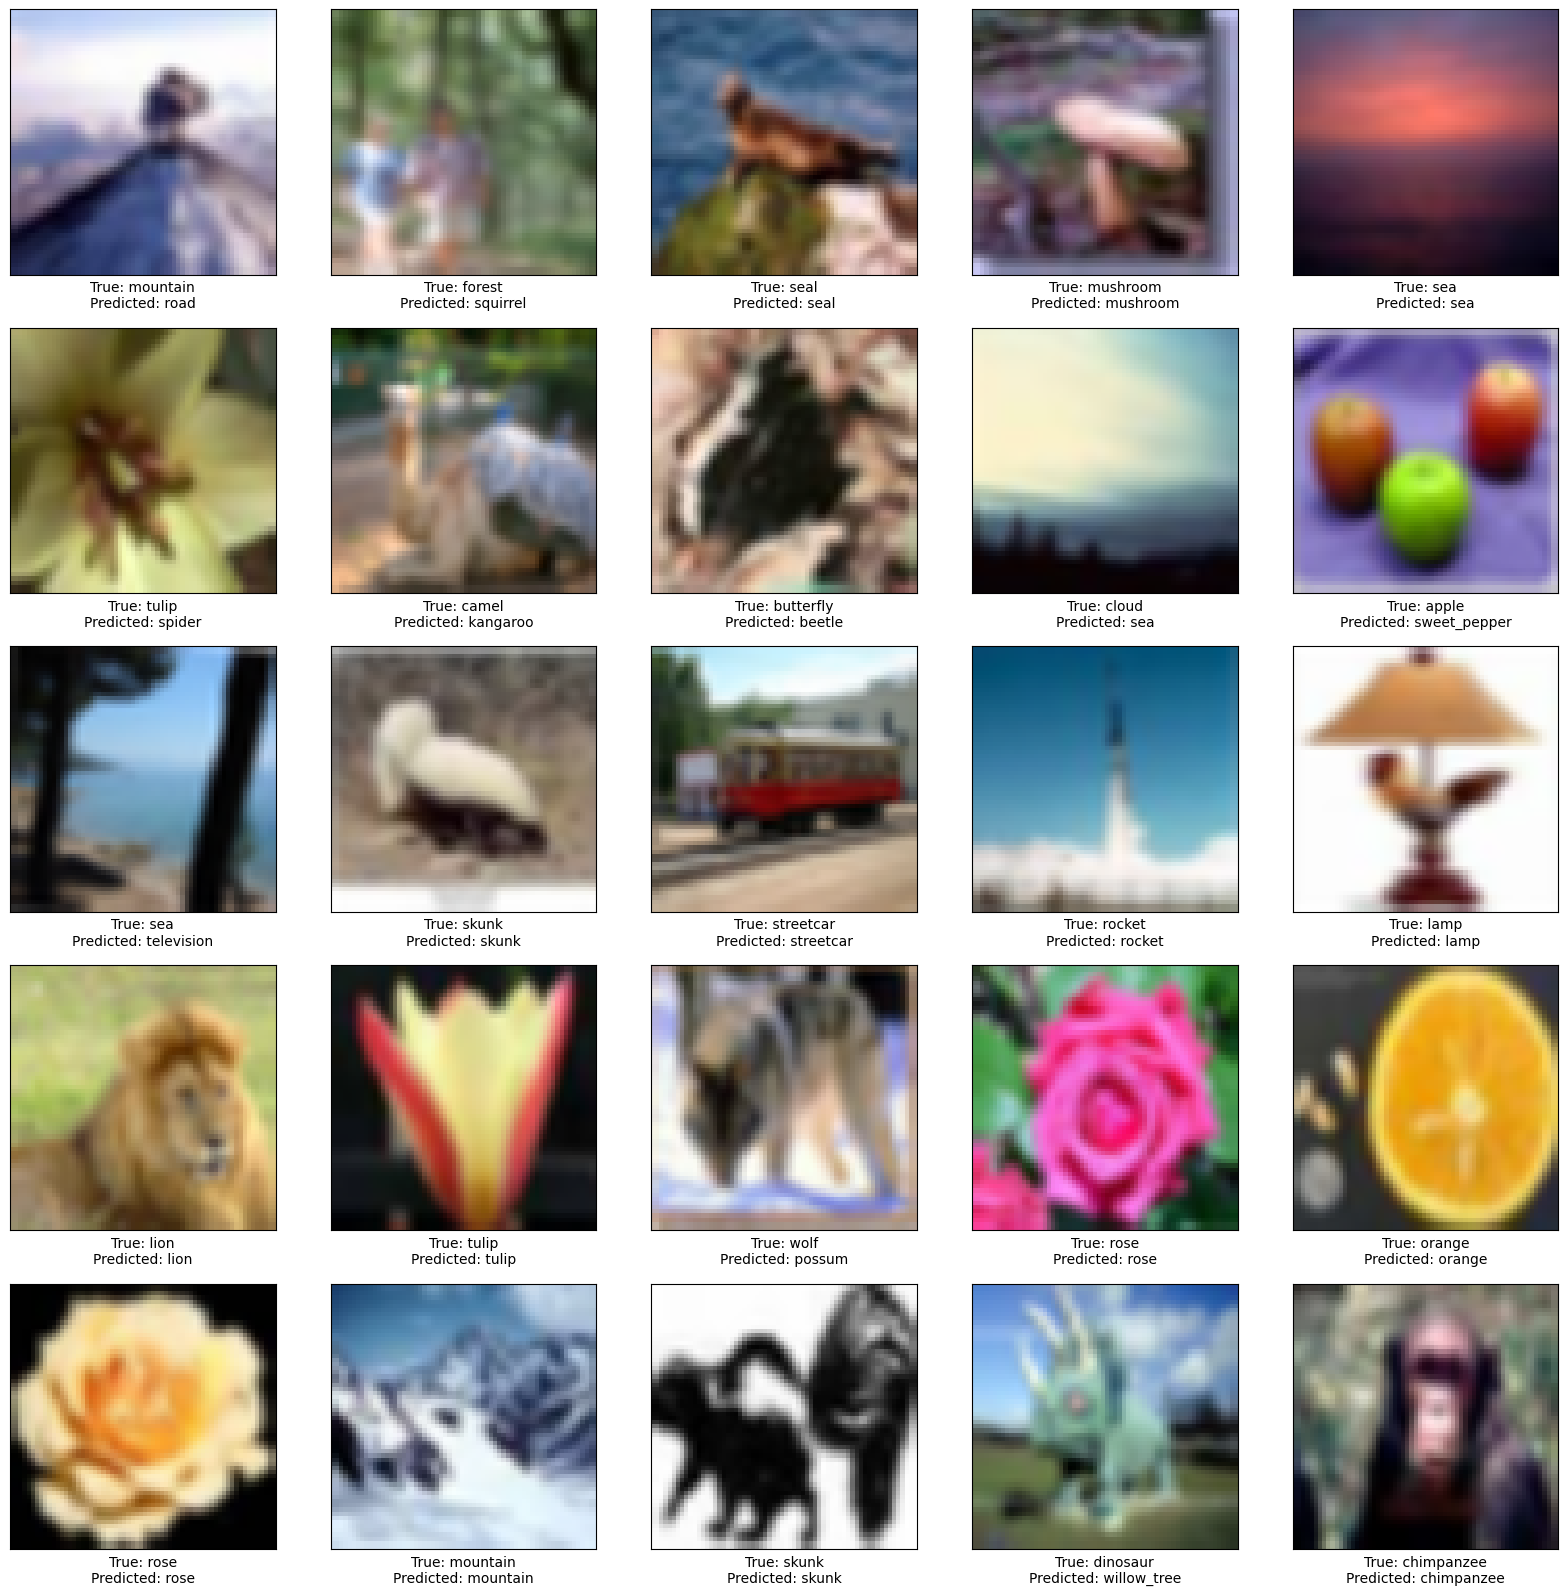

In [53]:
# Print true and predicted labels along with image names
plt.figure(figsize=(20, 20))
for i in range(25):  # Print 25 samples
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    true_label = class_names[y_test[i][0]]
    predicted_label = class_names[y_pred_classes[i]]
    plt.xlabel(f"True: {true_label}\nPredicted: {predicted_label}")
plt.show()